In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
plt.style.use('ggplot')
pd.set_option('max.columns', None)

In [60]:
file = '/Users/tim/Documents/GitHub/pandas_additional/data/bookings_2023.csv'
df = pd.read_csv(file)

In [121]:
df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,adr,is_canceled,reserved_sameas_assigned,total_nights,total_guests
0,Resort Hotel,BB,Direct,Direct,C,C,No Deposit,Transient,342,0,0,2,0.0,0,False,0,0,3,0,0,0,0.0,0,True,0,2.0
1,Resort Hotel,BB,Direct,Direct,C,C,No Deposit,Transient,737,0,0,2,0.0,0,False,0,0,4,0,0,0,0.0,0,True,0,2.0
2,Resort Hotel,BB,Direct,Direct,A,C,No Deposit,Transient,7,0,1,1,0.0,0,False,0,0,0,0,0,0,75.0,0,False,1,1.0
3,Resort Hotel,BB,Corporate,Corporate,A,A,No Deposit,Transient,13,0,1,1,0.0,0,False,0,0,0,0,0,0,75.0,0,True,1,1.0
4,Resort Hotel,BB,Online TA,TA/TO,A,A,No Deposit,Transient,14,0,2,2,0.0,0,False,0,0,0,0,0,1,98.0,0,True,2,2.0


## Features

| Feature | Description | Notes
| --- | --- | --- |
|hotel| Type of hotel |Resort Hotel|
| | | City Hotel |
|meal|Type of meal booked |Undefined/SC – no meal package |
| | | BB – Bed & Breakfast|
| | | HB – Half board (breakfast and one other meal – usually dinner)|
| | | FB – Full board (breakfast, lunch and dinner) |
|market_segment| Where the booking came from|The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|distribution_channel|Booking distribution channel | The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|reserved_room_type|Code of room type reserved | |
|assigned_room_type|Code for the type of room assigned to the booking| Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons or customer request |
|deposit_type| What kind of deposit was taken| |
|customer_type| Type of booking| Contract - when the booking has a contract associated to it
| | | Group – when the booking is associated to a group |
| | | Transient – when the booking is not part of a group or contract, and is not associated to another transient booking| 
| | | Transient-party – when the booking is transient, but is associated with at least one other transient booking |
|lead_time| How long in advance the booking was made (days)|
|stays_in_weekend_nights|Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
|stays_in_week_nights|Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel  |
|adults| Number of adult guests on the booking|
|children| Number of children |
|babies| Number of babies|
|is_repeated_guest| Whether the booking came from a repeat customer| 0 - no |
| | | 1 - yes |
|previous_cancellations| Number of previous cancellations by the customer|
|previous_bookings_not_canceled| Number of previous bookings by the customer not cancelled|
|booking_changes| Number of changes made by the customer after initial booking|
|days_in_waiting_list| Number of days the booking was in the waiting list before it was confirmed to the customer|
|required_car_parking_spaces|Number of car parking spaces required by the customer |
|total_of_special_requests| Number of special requests made by the customer|
|adr|Average daily rate|
|is_canceled| Whether the booking was cancelled | 0 - not cancelled |
| | | 1 - cancelled |

### Preliminary Information

In [61]:
df.columns

Index(['hotel', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'required_car_parking_spaces',
       'total_of_special_requests', 'adr', 'is_canceled'],
      dtype='object')

In [62]:
df.shape

(119390, 23)

In [63]:
df.dtypes

hotel                              object
meal                               object
market_segment                     object
distribution_channel               object
reserved_room_type                 object
assigned_room_type                 object
deposit_type                       object
customer_type                      object
lead_time                           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
days_in_waiting_list                int64
required_car_parking_spaces         int64
total_of_special_requests           int64
adr                               float64
is_canceled                         int64
dtype: object

In [64]:
df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,adr,is_canceled
0,Resort Hotel,BB,Direct,Direct,C,C,No Deposit,Transient,342,0,0,2,0.0,0,0,0,0,3,0,0,0,0.0,0
1,Resort Hotel,BB,Direct,Direct,C,C,No Deposit,Transient,737,0,0,2,0.0,0,0,0,0,4,0,0,0,0.0,0
2,Resort Hotel,BB,Direct,Direct,A,C,No Deposit,Transient,7,0,1,1,0.0,0,0,0,0,0,0,0,0,75.0,0
3,Resort Hotel,BB,Corporate,Corporate,A,A,No Deposit,Transient,13,0,1,1,0.0,0,0,0,0,0,0,0,0,75.0,0
4,Resort Hotel,BB,Online TA,TA/TO,A,A,No Deposit,Transient,14,0,2,2,0.0,0,0,0,0,0,0,0,1,98.0,0


### Duplicated Checks

In [65]:
df.duplicated().sum()

35186

### Missing Values

In [66]:
df.isna().sum()

hotel                             0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
customer_type                     0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
required_car_parking_spaces       0
total_of_special_requests         0
adr                               0
is_canceled                       0
dtype: int64

### EDA

In [67]:
# df['hotel'].value_counts()
df['hotel'] = df['hotel'].astype('category')

In [68]:
# Decided to remove 'undefined' because both SC and undefined represented that the guest had no meals
# df['meal'].value_counts()
df['meal'].replace('Undefined', 'SC', inplace=True)
df['meal'] = df['meal'].astype('category')

In [69]:
# df['market_segment'].value_counts()
df['market_segment'].replace('Undefined', np.nan, inplace=True)
df['market_segment'] = df['market_segment'].astype('category')

In [70]:
# df['distribution_channel'].value_counts()
df['distribution_channel'].replace('Undefined', np.nan, inplace=True)
df['distribution_channel'] = df['distribution_channel'].astype('category')

In [71]:
# df['reserved_room_type'].value_counts()
df['reserved_room_type'] = df['reserved_room_type'].astype('object')

In [72]:
# df['assigned_room_type'].value_counts()
df['assigned_room_type'] = df['assigned_room_type'].astype('object')

In [73]:
#  + a feature - check if reserved_room_type is always the assigned room when guests checks into the hotel
df['reserved_sameas_assigned'] = (df['reserved_room_type'] == df['assigned_room_type'])

In [74]:
# 87% of all bookings get their reserved rooms. this is to be expected.
df['reserved_sameas_assigned'].sum() / df.shape[0]

0.8750565373984421

In [75]:
# Now that they are compared with each other in the above cell, they can now be converted to categories.
df['assigned_room_type'] = df['assigned_room_type'].astype('category')
df['reserved_room_type'] = df['reserved_room_type'].astype('category')

In [76]:
# df['deposit_type'].value_counts()
df['deposit_type'] = df['deposit_type'].astype('category')

In [77]:
# df['customer_type'].value_counts()
df['customer_type'] = df['customer_type'].astype('category')

In [78]:
# df['lead_time'].value_counts()

<AxesSubplot:ylabel='Frequency'>

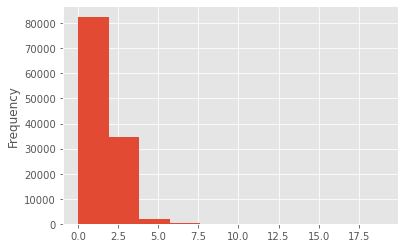

In [79]:
# df['stays_in_weekend_nights'].value_counts()
df['stays_in_weekend_nights'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

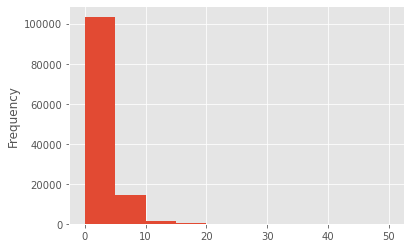

In [80]:
# df['stays_in_week_nights'].value_counts()
df['stays_in_week_nights'].plot.hist()

In [81]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

<AxesSubplot:ylabel='Frequency'>

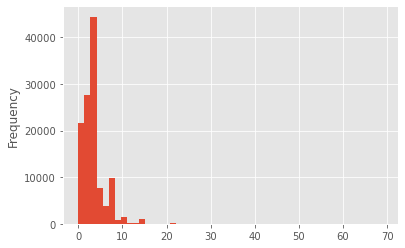

In [82]:
df['total_nights'].plot.hist(bins=50)

In [83]:
# df['adults'].value_counts()

In [84]:
# df['children'].value_counts()
# df['children'] = df['children'].astype('int')

In [85]:
df['total_guests'] = (df['children'] + df['adults'] + df['babies'])

In [86]:
# df['is_repeated_guest'].value_counts()
df['is_repeated_guest'] = df['is_repeated_guest'].astype('bool')

In [87]:
# df['previous_cancellations'].isna().sum() # 0 null values
# df['previous_cancellations'].value_counts()

In [88]:
# df['previous_bookings_not_canceled'].isna().sum()
# df['previous_bookings_not_canceled'].value_counts()

In [89]:
# df['booking_changes'].isna().sum() # 0 null values
# df['booking_changes'].value_counts()

In [90]:
# df['days_in_waiting_list'].isna().sum()
# df['days_in_waiting_list'].value_counts()

In [95]:
# df['required_car_parking_spaces'].isna().sum() # 0 nulls
# df['required_car_parking_spaces'].value_counts()

In [96]:
# df['total_of_special_requests'].isna().sum()
# df['total_of_special_requests'].value_counts()

In [97]:
# df['is_canceled'].isna().sum()
# df['is_canceled'].value_counts()

### Plots

In [98]:
categorical_var = ['hotel', 'meal', 'market_segment', 'distribution_channel', 
                   'reserved_room_type', 'assigned_room_type', 'reserved_sameas_assigned',
                   'deposit_type', 'customer_type', 'is_repeated_guest', 'is_canceled']
continuous_var = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 
                  'total_nights', 'adults', 'children', 'babies', 'total_guests',
                  'previous_cancellations',  'previous_bookings_not_canceled',
                  'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces',
                  'total_of_special_requests', 'adr']

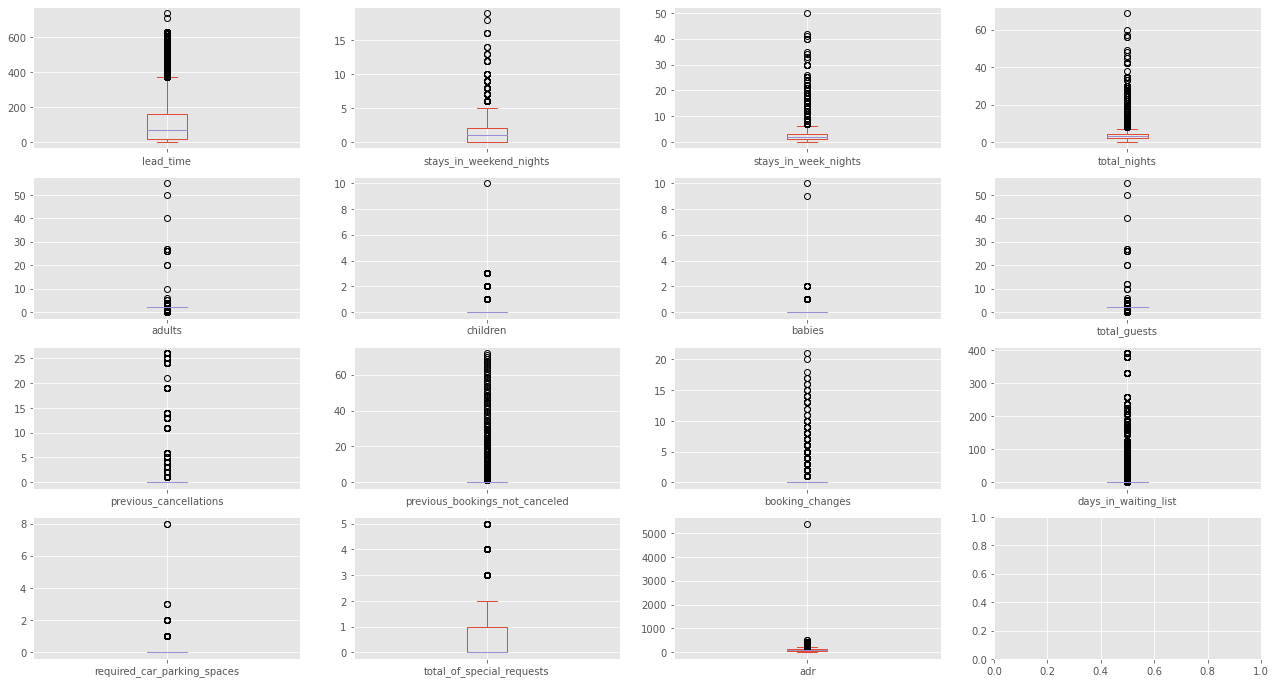

In [99]:
fig, ax = plt.subplots(4, 4)
fig.set_size_inches(22,12)

for index, column in enumerate(continuous_var):
    a = df[column].plot.box(ax=ax.flatten()[index])

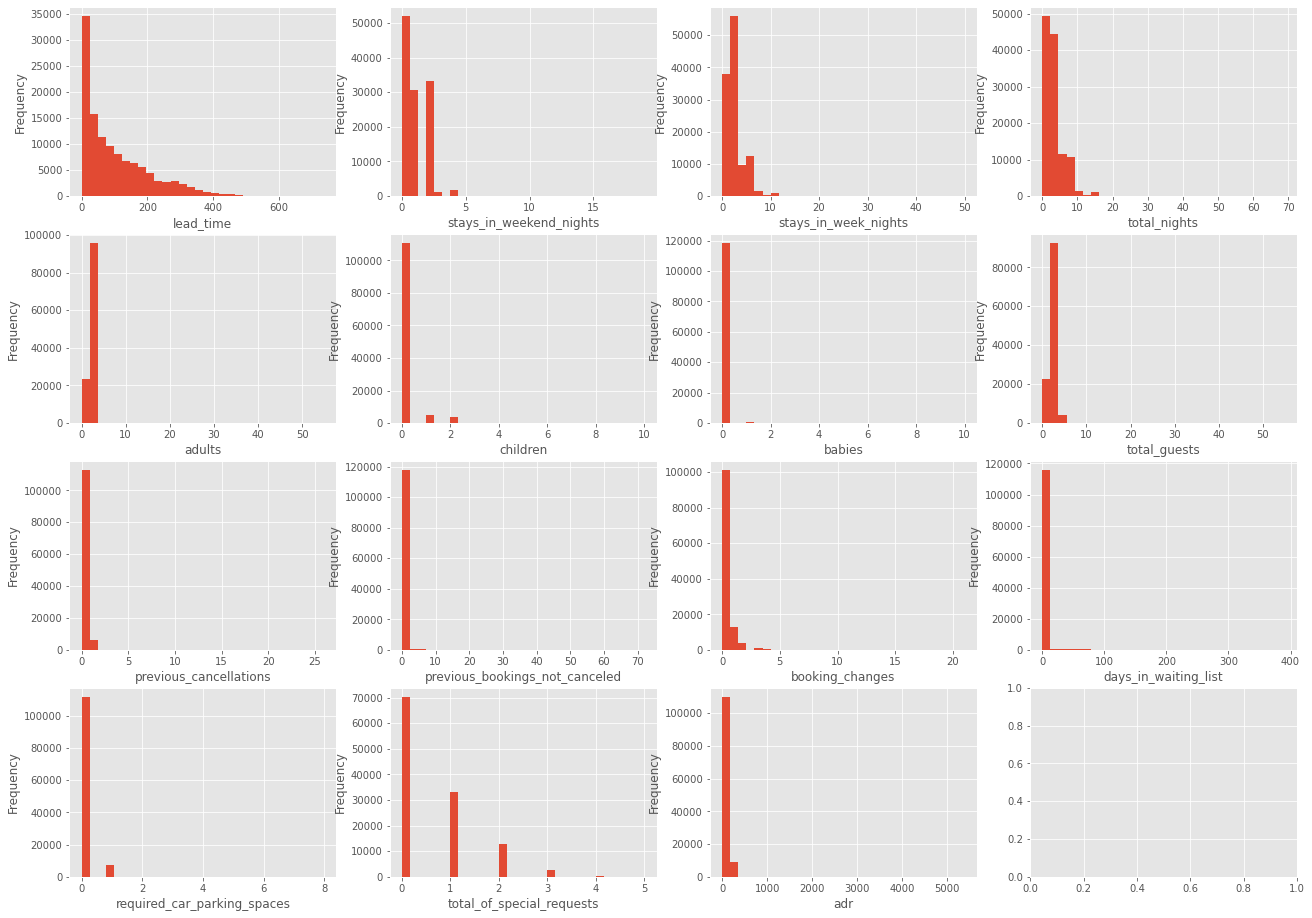

In [100]:
fig, ax = plt.subplots(4, 4)
fig.set_size_inches(22, 16)

for index, column in enumerate(continuous_var):
    a = df[column].plot.hist(ax=ax.flatten()[index], bins=30)
    a.set_xlabel(column)


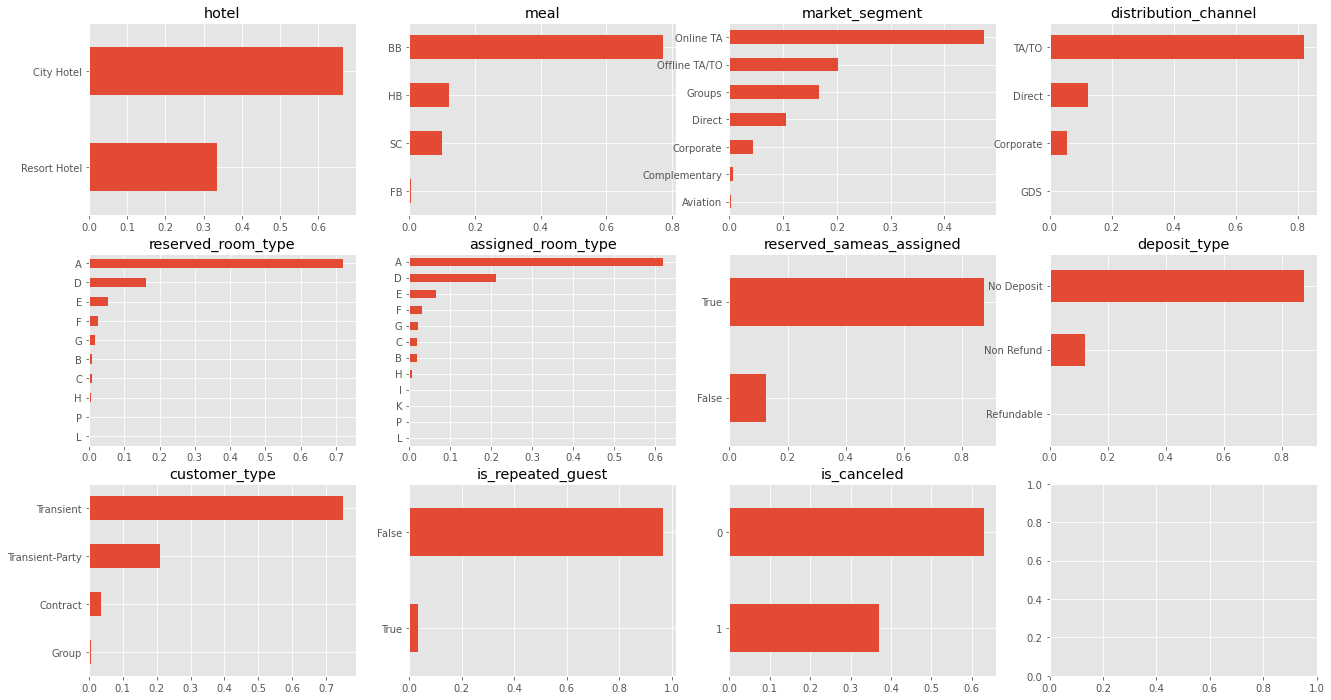

In [101]:
fig, ax = plt.subplots(3, 4)
fig.set_size_inches(22,12)

for index, column in enumerate(categorical_var):
    data = df[column].value_counts() / df.shape[0]
    a = data.plot(kind='barh', ax=ax.flatten()[index])
    a.set_title(column)
    a.invert_yaxis()

<Figure size 1332x1008 with 0 Axes>

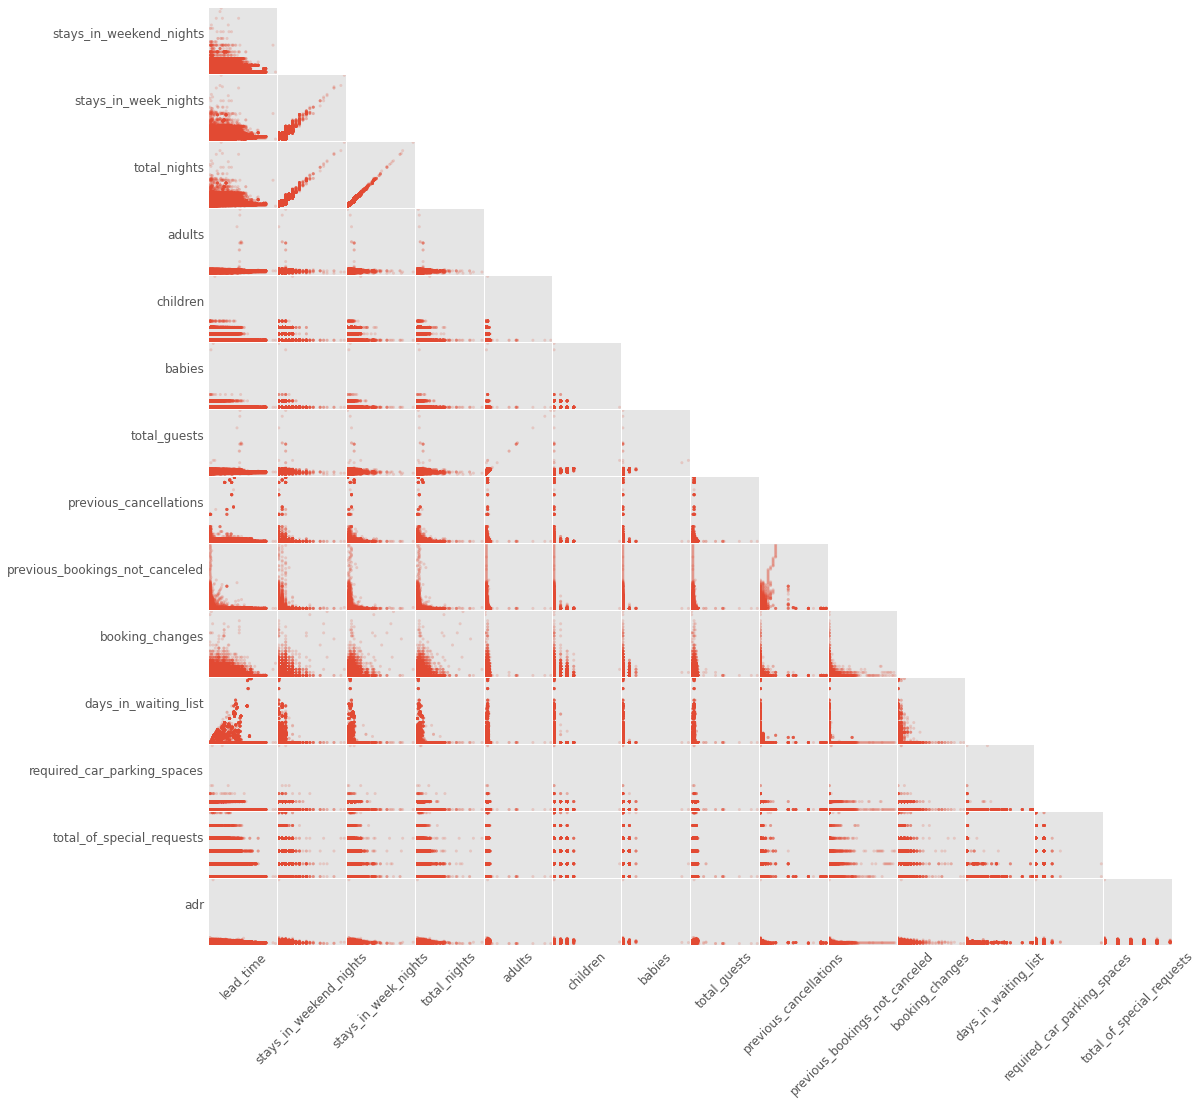

In [102]:
plt.figure(figsize=(18.5, 14))
sm = pd.plotting.scatter_matrix(
    df[continuous_var],
    figsize=(18.5,18.5), alpha=0.2)

for subaxis in sm:
    for ax in subaxis:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        ax.xaxis.label.set_rotation(45)
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.label.set_ha('right')

for i in range(np.shape(sm)[0]):
    for j in range(np.shape(sm)[1]):
        if i <= j:
            sm[i,j].set_visible(False)

plt.show()

In [ ]:
plt.

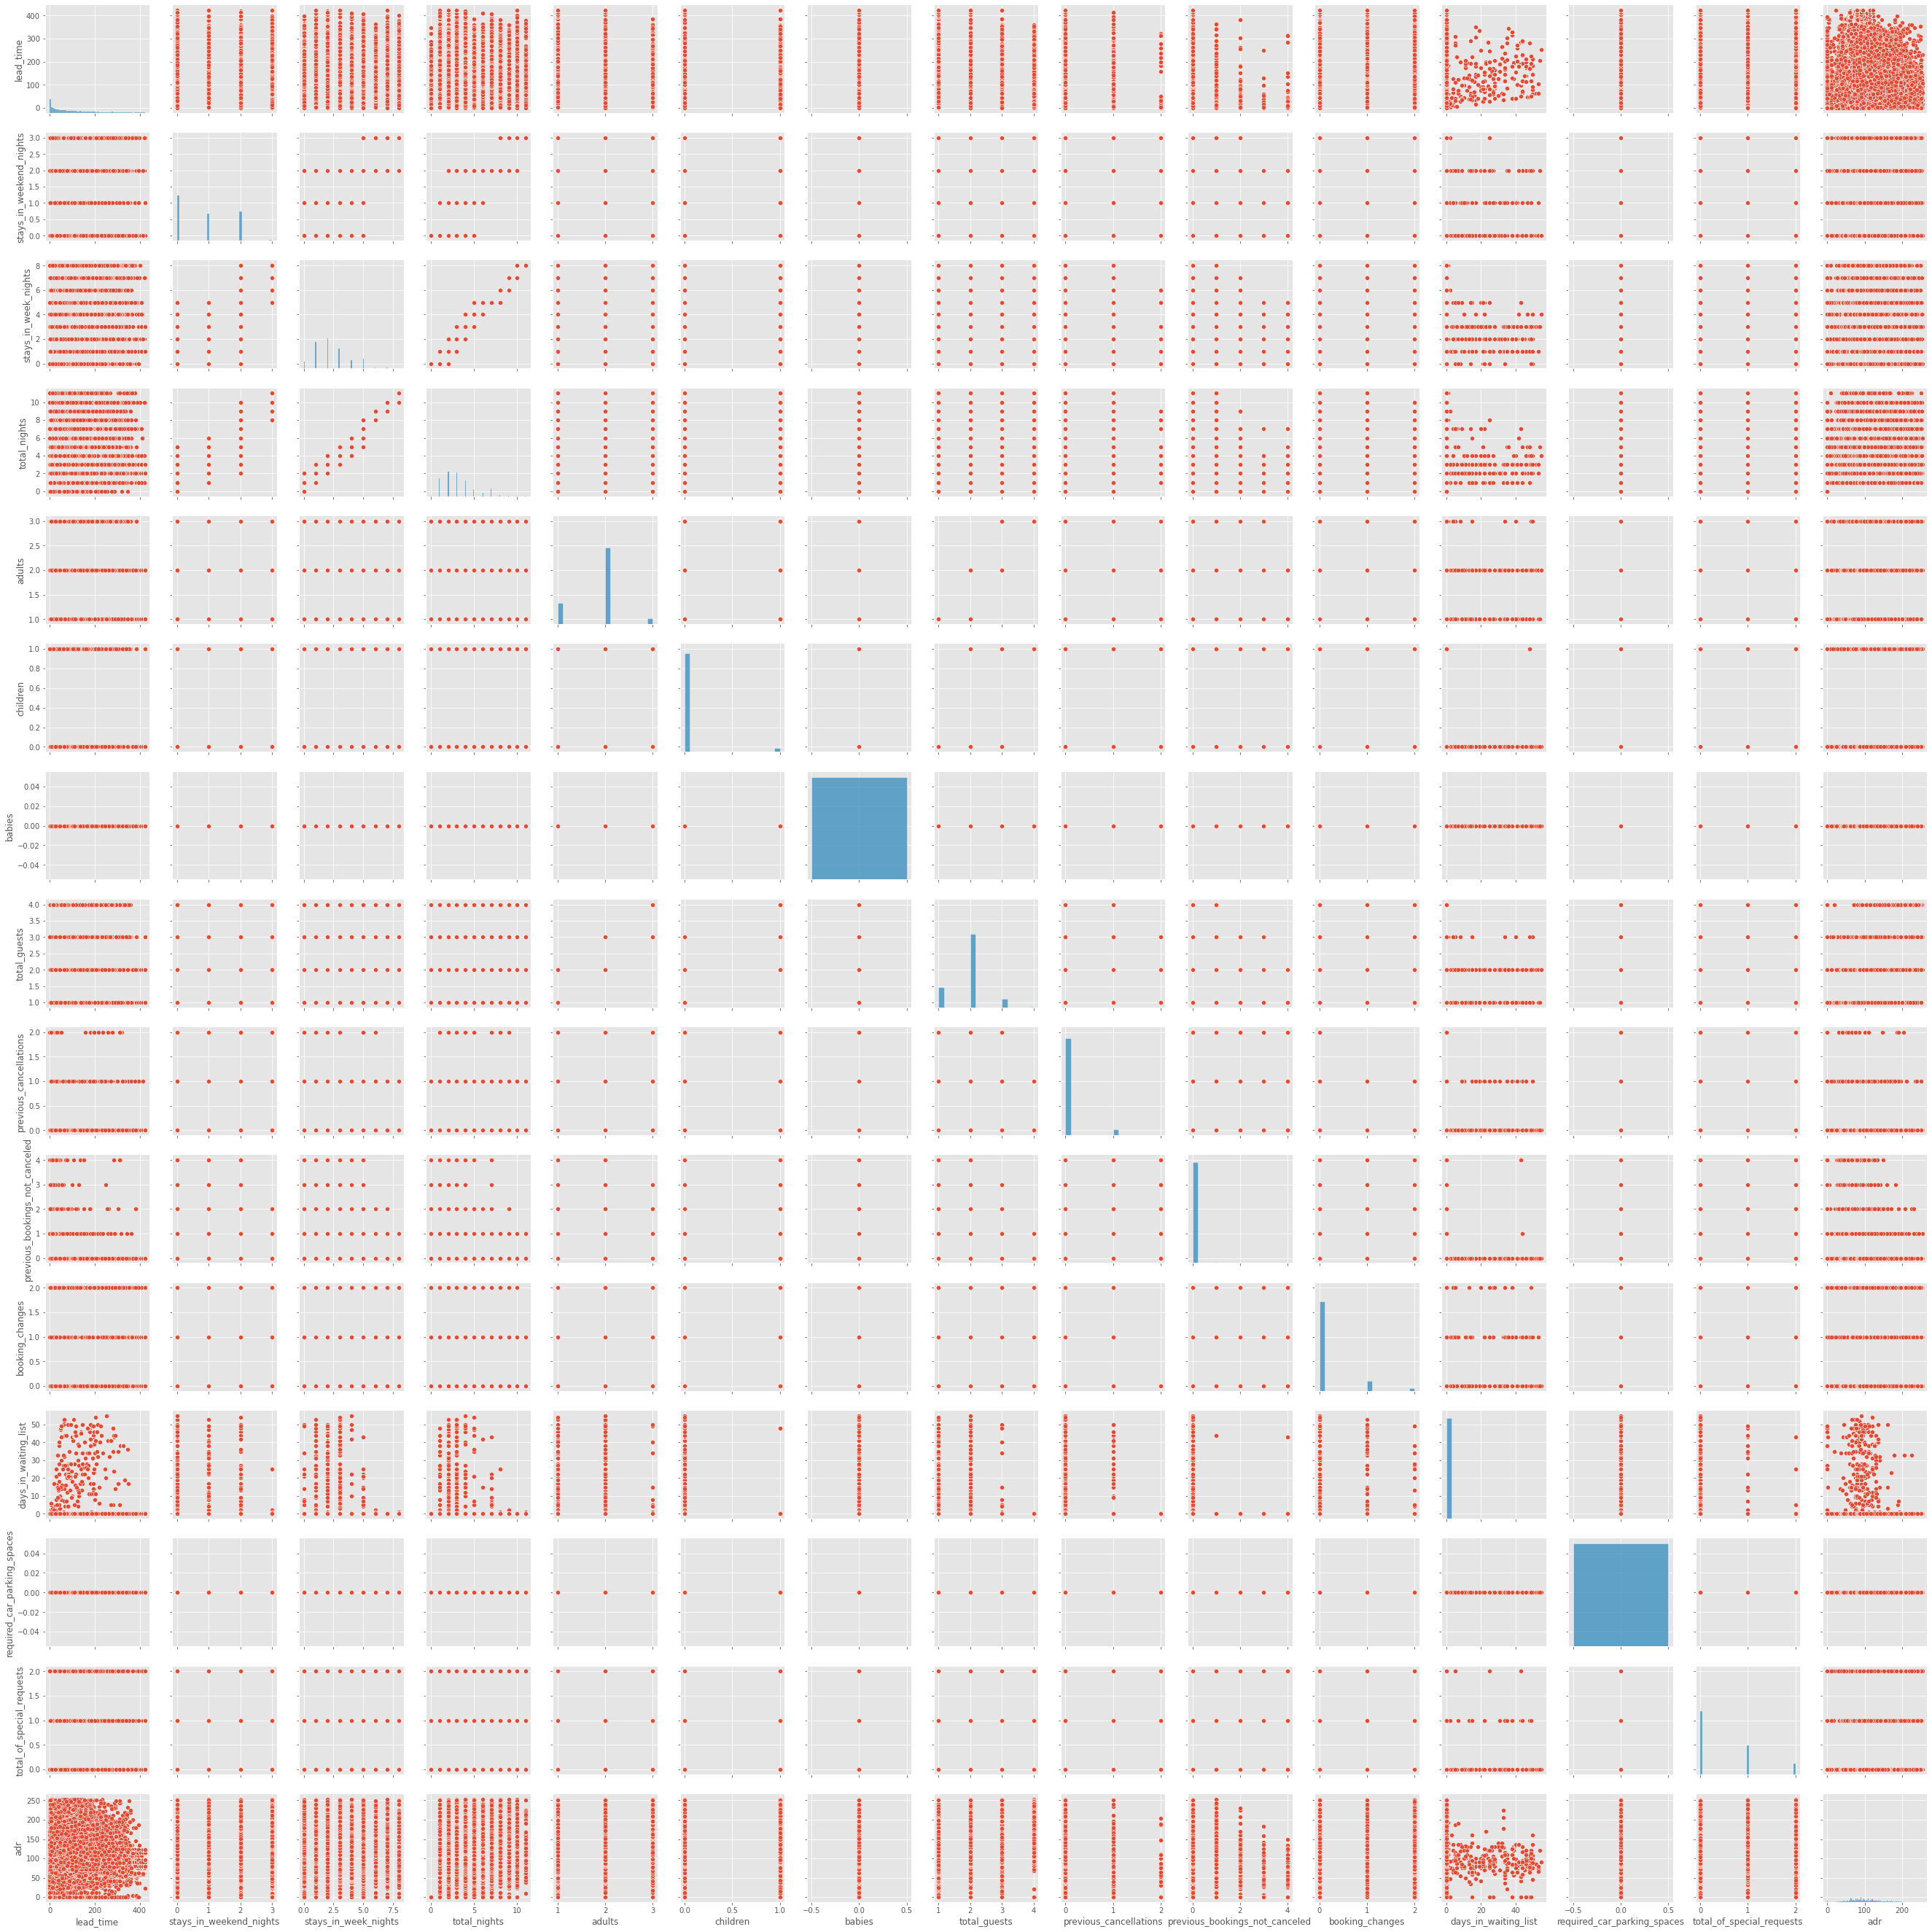

In [120]:
test = data_subset[(np.abs(stats.zscore(data_subset)) < 3).all(axis=1)]
plt.tigh
sns.pairplot(test)


In [105]:
data_subset = df[continuous_var]
data_subset = data_subset.dropna()

<Figure size 1332x1008 with 0 Axes>

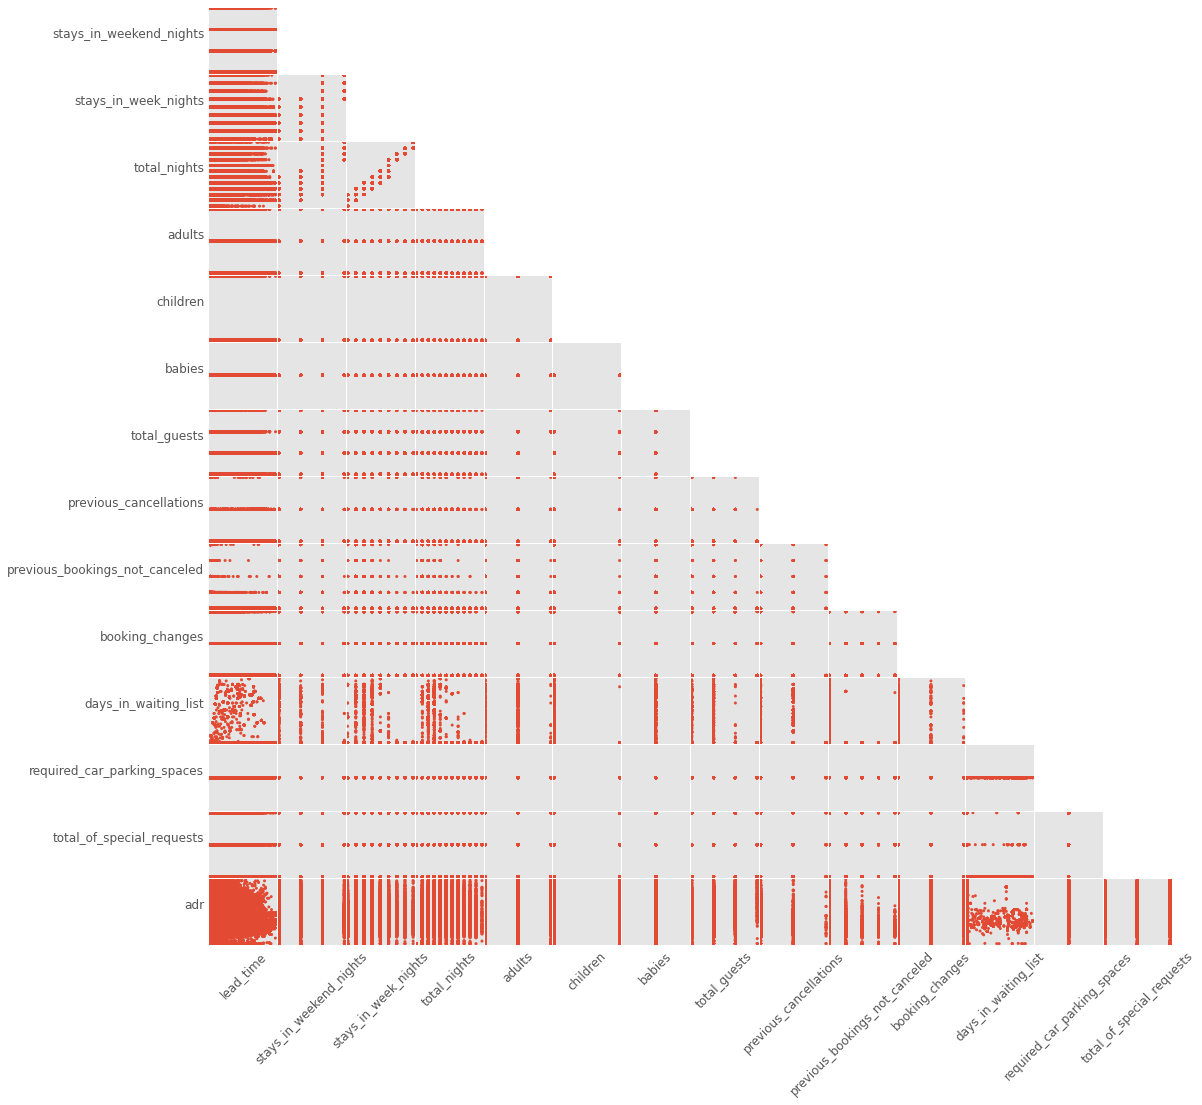

In [117]:
plt.figure(figsize=(18.5, 14))
sm = pd.plotting.scatter_matrix(
    data_subset[(np.abs(stats.zscore(data_subset)) < 3).all(axis=1)],
    figsize=(18.5,18.5), alpha=1)

for subaxis in sm:
    for ax in subaxis:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        ax.xaxis.label.set_rotation(45)
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.label.set_ha('right')

for i in range(np.shape(sm)[0]):
    for j in range(np.shape(sm)[1]):
        if i <= j:
            sm[i,j].set_visible(False)


In [120]:
s

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'total_nights', 'adults', 'children', 'babies', 'total_guests',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'total_of_special_requests', 'adr'],
      dtype='object')

In [122]:
data_subset.drop(['children', 'total_guests'])

,children,total_guests
0,0,2
1,0,2
2,0,1
3,0,1
4,0,2
...,...,...
119385,0,2
119386,0,3
119387,0,2
119388,0,2
